## Ananta Faadillah Sophan
## Milestone 2 
## Phase 1-Batch HCK-002



#Problem Statement
Memprediksi Harga Handphone sesuai dengan spesifikasi Handphone yang diinginkan oleh seorang Customer

## Import Libraries

Import Library yang dibutuhkan

In [ ]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pickle
warnings.filterwarnings('ignore')

from scipy import stats
from sklearn import set_config
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from feature_engine.outliers import Winsorizer
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score,mean_squared_error
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [137]:
import sklearn
sklearn.__version__

'1.0.2'

In [138]:
import feature_engine
feature_engine.__version__

'1.4.0'

## Data Loading

Import Dataset yang dibutuhkan dan melakukan sedikit Overview data

In [ ]:
df = pd.read_csv('/content/ndtv_data_final.csv')

In [ ]:
df.head()

,Unnamed: 0,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,...,Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
0,0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,4085,6.67,Yes,1440,3120,8,...,48.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,58998
1,1,Realme X2 Pro,Realme,X2 Pro,4000,6.50,Yes,1080,2400,8,...,64.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,27999
2,2,iPhone 11 Pro Max,Apple,iPhone 11 Pro Max,3969,6.50,Yes,1242,2688,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,106900
3,3,iPhone 11,Apple,iPhone 11,3110,6.10,Yes,828,1792,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,62900
4,4,LG G8X ThinQ,LG,G8X ThinQ,4000,6.40,Yes,1080,2340,8,...,12.0,32.0,Android,Yes,Yes,Yes,1,No,No,49990


In [ ]:
df.shape

(1359, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1359 non-null   int64  
 1   Name                    1359 non-null   object 
 2   Brand                   1359 non-null   object 
 3   Model                   1359 non-null   object 
 4   Battery capacity (mAh)  1359 non-null   int64  
 5   Screen size (inches)    1359 non-null   float64
 6   Touchscreen             1359 non-null   object 
 7   Resolution x            1359 non-null   int64  
 8   Resolution y            1359 non-null   int64  
 9   Processor               1359 non-null   int64  
 10  RAM (MB)                1359 non-null   int64  
 11  Internal storage (GB)   1359 non-null   float64
 12  Rear camera             1359 non-null   float64
 13  Front camera            1359 non-null   float64
 14  Operating system        1359 non-null   

In [ ]:
df.isnull().sum()

Unnamed: 0                0
Name                      0
Brand                     0
Model                     0
Battery capacity (mAh)    0
Screen size (inches)      0
Touchscreen               0
Resolution x              0
Resolution y              0
Processor                 0
RAM (MB)                  0
Internal storage (GB)     0
Rear camera               0
Front camera              0
Operating system          0
Wi-Fi                     0
Bluetooth                 0
GPS                       0
Number of SIMs            0
3G                        0
4G/ LTE                   0
Price                     0
dtype: int64

In [ ]:
df[df.duplicated()].shape

(0, 22)

In [ ]:
for x in df:
    print(f'Value In {x}: ', df[x].unique(), '\n', 'Total Value:', len(df[x].unique()))
    print('-'*100)

Value In Unnamed: 0:  [   0    1    2 ... 1356 1357 1358] 
 Total Value: 1359
----------------------------------------------------------------------------------------------------
Value In Name:  ['OnePlus 7T Pro McLaren Edition' 'Realme X2 Pro' 'iPhone 11 Pro Max' ...
 'Intex Aqua Y4' 'iBall Andi4 B20' 'iBall Andi Avonte 5'] 
 Total Value: 1359
----------------------------------------------------------------------------------------------------
Value In Brand:  ['OnePlus' 'Realme' 'Apple' 'LG' 'Samsung' 'Asus' 'Xiaomi' 'Oppo' 'Huawei'
 'Google' 'Nokia' 'HTC' 'Motorola' 'Honor' 'Yu' 'Poco' 'Vivo' 'Nubia'
 'Black Shark' 'Infinix' 'Lenovo' 'Sony' 'Jio' 'Coolpad' 'Micromax'
 'Smartron' 'LeEco' 'BlackBerry' 'Gionee' 'Meizu' 'Panasonic' 'Tecno'
 'InFocus' 'Itel' '10.or' 'Lava' 'Cat' 'Lyf' 'Intex' 'Xolo' 'Acer'
 'Phicomm' 'Karbonn' 'Spice' 'iVoomi' 'Kult' 'Nuu Mobile' 'Ziox' 'Zopo'
 'ZTE' 'Onida' 'Microsoft' 'iBall' 'Mobiistar' 'Comio' 'Videocon'
 'Alcatel' 'Reach' 'Zen' 'Tambo' 'Razer' 'Homto

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1359.0,679.000000,392.453819,0.000,339.5,679.0,1018.5,1358.0
Battery capacity (mAh),1359.0,2938.489330,873.514133,1010.000,2300.0,3000.0,3500.0,6000.0
Screen size (inches),1359.0,5.291310,0.671357,2.400,5.0,5.2,5.7,7.3
Resolution x,1359.0,811.543046,270.707271,240.000,720.0,720.0,1080.0,2160.0
Resolution y,1359.0,1490.777778,557.780120,320.000,1280.0,1280.0,1920.0,3840.0
Processor,1359.0,5.551141,2.196562,1.000,4.0,4.0,8.0,10.0
RAM (MB),1359.0,2488.777778,1664.440386,64.000,1000.0,2000.0,3000.0,12000.0
Internal storage (GB),1359.0,30.654864,36.950241,0.064,8.0,16.0,32.0,512.0
Rear camera,1359.0,12.070199,8.948337,0.000,8.0,12.2,13.0,108.0
Front camera,1359.0,7.037969,6.295448,0.000,2.0,5.0,8.0,48.0


Setelah dilakukan pengecekan data, dapat dilihat bahwa tidak ada missing values ataupun duplikasi data, Setelah dilihat unique value pada setiap kolomnya, rata-rata kolom mempunyai High Cardinality dan dari statistik deskriptif, ada beberapa nilai Min dan Max sangat jauh (Pengecekan lebih lanjut akan dicek pada Handling Data Outlier).

## Data Cleaning

In [ ]:
df_clean = df.copy()
df_clean.drop(['Name','Model','Unnamed: 0'],axis =1, inplace = True)
df_clean.head()

,Brand,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,RAM (MB),Internal storage (GB),Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
0,OnePlus,4085,6.67,Yes,1440,3120,8,12000,256.0,48.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,58998
1,Realme,4000,6.50,Yes,1080,2400,8,6000,64.0,64.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,27999
2,Apple,3969,6.50,Yes,1242,2688,6,4000,64.0,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,106900
3,Apple,3110,6.10,Yes,828,1792,6,4000,64.0,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,62900
4,LG,4000,6.40,Yes,1080,2340,8,6000,128.0,12.0,32.0,Android,Yes,Yes,Yes,1,No,No,49990


Pada bagian cleaning, saya menghapus kolom 'Name', 'Model'.'Unnamed: 0', karena ketiga kolom tersebut merupakan unique value pada setiap entry datanya dan tidak mempunyai pengaruh apa-apa terhadap harga Handphone. Selain itu, Value pada ketiga kolom tersebut tidak bisa dikelompokkan karena semuanya memiliki keunikan masing-masing.

--------------------------------------------------------------------------------

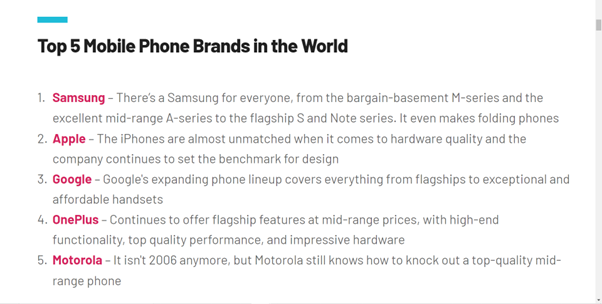


Berdasarkan Informasi ini, saya akan melakukan pengolompokan pada Brand dimana Brand yang bukan merupakan 5 Top Brand ini akan dikelompokkan menjadi 'Others'

SOURCE: https://tech.co/phones/best-phone-brands

--------------------------------------------------------------------------------

### Grouping: Brand

In [ ]:
brand_manipulated = []

for i in df_clean['Brand']:
    if i=='Samsung' or i=='Apple' or i=='Motorola' or i=='Google' or i=='OnePlus' :
        brand_manipulated.append(i)
    else:
        brand_manipulated.append('Others')

df_clean['Brand'] = brand_manipulated.copy()


In [ ]:
df_clean['Brand'].unique()

array(['OnePlus', 'Others', 'Apple', 'Samsung', 'Google', 'Motorola'],
      dtype=object)

## Exploratory Data Analysis

Mengambil data inference sebanyak 2 entry data

In [ ]:
df_inf = df_clean.sample(2, random_state=0)
df_inf

,Brand,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,RAM (MB),Internal storage (GB),Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
965,Others,4000,5.50,Yes,720,1280,4,2000,16.0,8.0,5.0,Android,Yes,Yes,Yes,2,Yes,Yes,4499
657,Others,2400,5.45,Yes,480,960,4,1000,8.0,5.0,2.0,Android,Yes,Yes,Yes,2,Yes,Yes,3751


Menghapus data inference didalam dataset agar tidak terjadi Leaking Data

In [ ]:
df = df_clean.drop(df_inf.index)

Memisahkan Train and Test, X dan Y

In [ ]:
# define feature and target
X = df_clean.drop('Price', axis=1)
y = df_clean['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

Membuat dataframe untuk melakukan EDA

In [ ]:
df_eda = pd.concat([X_train, y_train], axis=1)

df_eda.shape

(951, 19)

Membuat fungsi Plotting pada Boolean Feature (Yes/No)

In [107]:
def pie_bool(df):
    
    fig = make_subplots(rows=2, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}],[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])
     
    labels = ["Yes","No"]

    values = df['Touchscreen'].value_counts().values
    fig.add_trace(go.Pie(labels=labels, values=values, name="Touchscreen", title="Touchscreen"),1, 1)
    
    values = df['Wi-Fi'].value_counts().values
    fig.add_trace(go.Pie(labels=labels, values=values, name="Wi-Fi", title="Wi-Fi"),1, 2)
               
    values = df['Bluetooth'].value_counts().values
    fig.add_trace(go.Pie(labels=labels, values=values, name="Bluetooth", title="Bluetooth"),1, 3)    
        
    values = df['GPS'].value_counts().values
    fig.add_trace(go.Pie(labels=labels, values=values, name="GPS", title="GPS"),2, 1)    
                
    values = df['3G'].value_counts().values
    fig.add_trace(go.Pie(labels=labels, values=values, name="3G", title="3G"),2, 2)    

    values = df['4G/ LTE'].value_counts().values
    fig.add_trace(go.Pie(labels=labels, values=values, name="4G/ LTE", title="4G/ LTE"),2, 3)    
        
        
    fig.update_traces(hole=.55, hoverinfo="label+percent+name")

    fig.update_layout(title_text="Boolean Feature")
    fig.show()

In [108]:
pie_bool(df)

Dapat dilihat dari hasil EDA, Handphone pada zaman ini hampir semuanya adalah layar Touchscreen, koneksi untuk Wi-Fi, dan memiliki Bluetooth. Tidak hanya itu rata-rata Handphone memiliki GPS dan dapat memakai sinyal 3G, namun pada sinyal 4G, sebanyak 25.6% Handphone belum bisa memakai sinyal 4G

--------------------------------------------------------------------------------

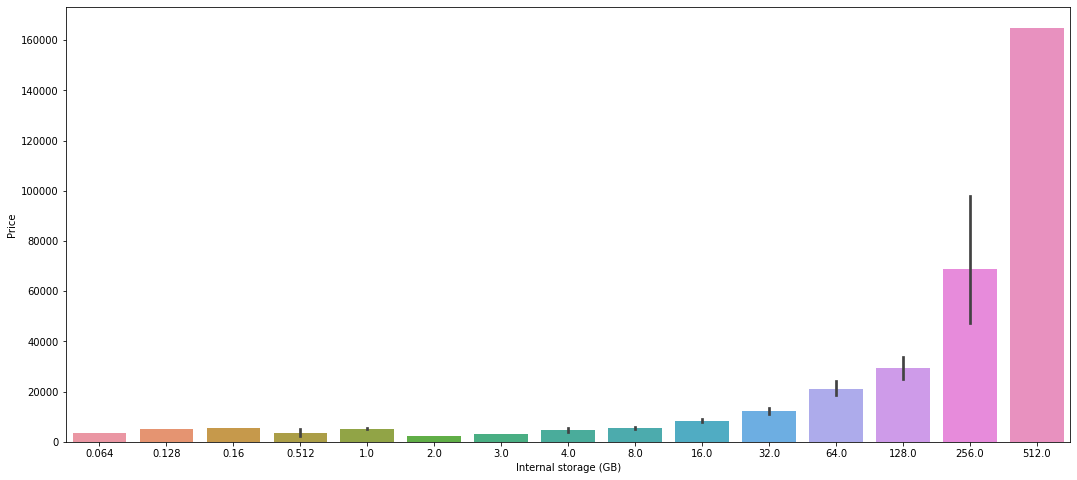

In [136]:
plt.figure(figsize=(18,8))
plt5 = sns.barplot(x = "Internal storage (GB)",data=df_clean,y="Price")
plt.show()

Jika dilihat dari hasil EDA, dapat dilihat bahwa Internal Storage dan Harga Handphone hampir berbanding lurus, dimana semakin besar memori penyimpanan, biasanya harga semakin mahal. dan perbandingan harga dari memori terkecil dan memori terbesar memiliki harga yang cukup jauh

--------------------------------------------------------------------------------

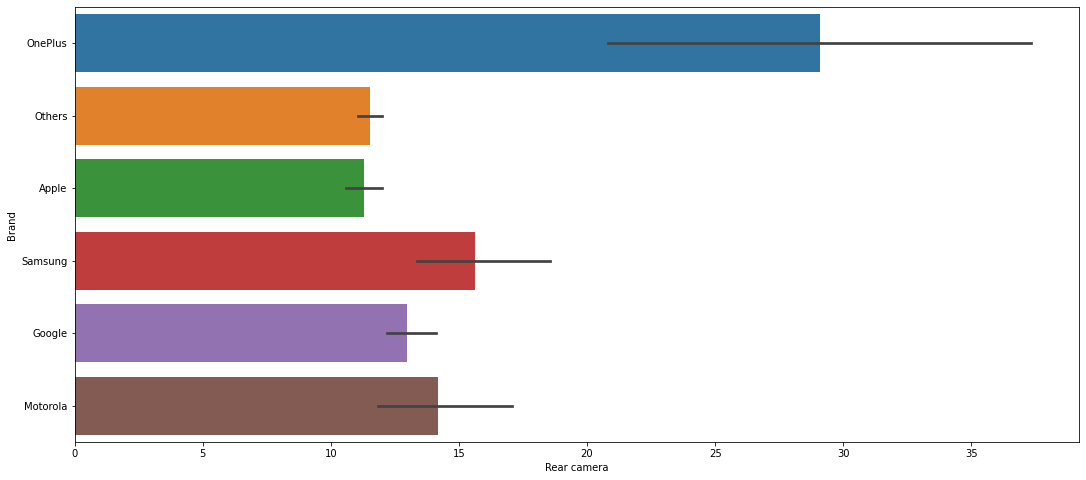

In [135]:
plt.figure(figsize=(18,8))
plt5 = sns.barplot(x = "Rear camera",data=df_clean,y="Brand")
plt.show()

Jika kita lihat dari kamera belakang pada Handphone, Brand OnePlus memiliki kamera belakang yang paling baik, diikuti oleh Samsung di urutan kedua.

### Numerical Columns

Memisahkan kolom numerikal pada dataset

In [ ]:
numcol = df_eda.select_dtypes(exclude=['object']).columns.tolist()
numcol

['Battery capacity (mAh)',
 'Screen size (inches)',
 'Resolution x',
 'Resolution y',
 'Processor',
 'RAM (MB)',
 'Internal storage (GB)',
 'Rear camera',
 'Front camera',
 'Number of SIMs',
 'Price']

In [111]:
df_num = df_eda[numcol]

#### Heatmap Correlation for Numerical Features

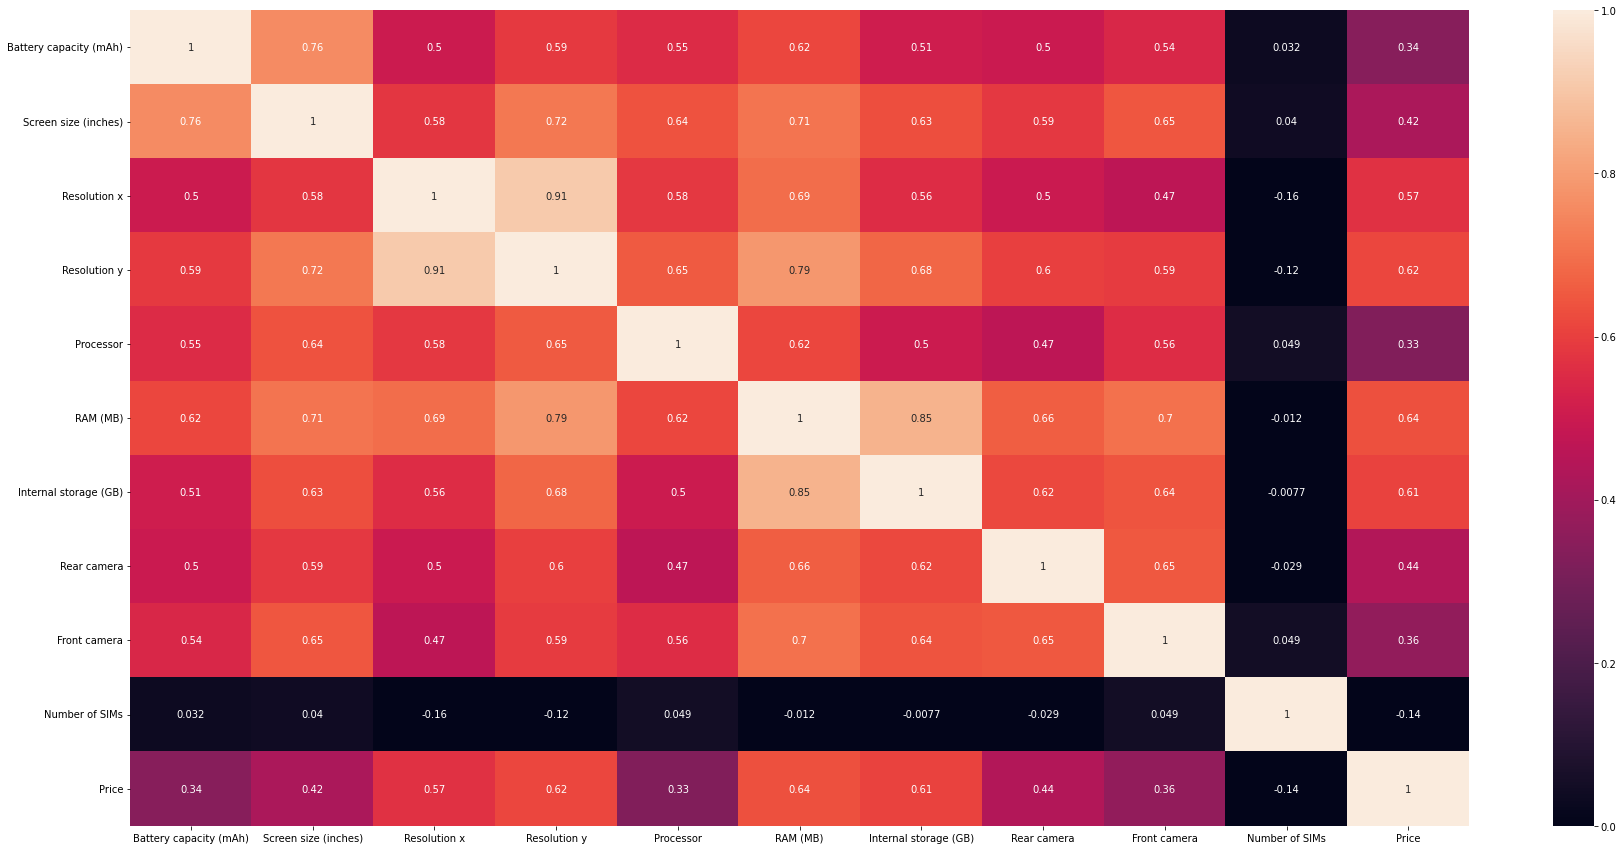

In [ ]:


plt.figure(figsize=(30, 15))
sns.heatmap(df_num.corr(), annot= True, vmin=0, vmax=1)
plt.show()


berdasarkan hasil dari Heatmap Correlation, jika saya mengambil threshold sebesar 0.4, maka saya akan mengambil 6 feature yang memiliki nilai diatas o.4 karena feature tersebut memiliki pengaruh yang cukup terhadap Harga yang dimiliki suatu Handphone

In [ ]:
df_num = df_num[[ 'Price','Resolution x',
 'Resolution y',
 'RAM (MB)',
 'Internal storage (GB)',
 'Screen size (inches)',
 'Rear camera']]

### Categorical Columns

Memisahkan kolom kategorikal pada dataset

In [ ]:
catcol = df_eda.select_dtypes(include=['object']).columns.tolist() + ['Price']
catcol

['Brand',
 'Touchscreen',
 'Operating system',
 'Wi-Fi',
 'Bluetooth',
 'GPS',
 '3G',
 '4G/ LTE',
 'Price']

In [ ]:
df_cat = df_eda[catcol]

In [ ]:
df_cat['Brand'].unique()

array(['Others', 'OnePlus', 'Samsung', 'Motorola', 'Google', 'Apple'],
      dtype=object)

#### Ordinal Encoding

Melakukan Ordinal Encoding pada feature yang merupakan boolean feature dan feature yang memiliki Rank yaitu Brand. Rank pada Brand diurutkan berdasarkan Top Brand yang paling banyak melakukan penjualan

In [ ]:
touchscreen_cat = ['Yes', 'No']
wifi_cat = ['Yes', 'No']
bt_cat = ['Yes', 'No']
gps_cat =['Yes', 'No']
tg_cat =['Yes', 'No']
fg_cat =['Yes', 'No']
brand_cat = ['Apple','Samsung','Google','OnePlus', 'Motorola','Others' ]

ord_enc = OrdinalEncoder(categories=[touchscreen_cat, wifi_cat, bt_cat, gps_cat, tg_cat, fg_cat,brand_cat])
cat_ord = pd.DataFrame(ord_enc.fit_transform(df_cat[['Touchscreen', 'Wi-Fi', 'Bluetooth', 'GPS', '3G', '4G/ LTE', 'Brand']]))

cat_ord.columns = ['Touchscreen', 'Wi-Fi', 'Bluetooth', 'GPS', '3G', '4G/ LTE', 'Brand']
review = pd.concat([df_cat[['Touchscreen', 'Wi-Fi', 'Bluetooth', 'GPS', '3G', '4G/ LTE', 'Brand']].reset_index(drop=True), cat_ord], axis=1)

review

,Touchscreen,Wi-Fi,Bluetooth,GPS,3G,4G/ LTE,Brand,Touchscreen,Wi-Fi,Bluetooth,GPS,3G,4G/ LTE,Brand
0,Yes,Yes,Yes,Yes,No,Yes,Others,0.0,0.0,0.0,0.0,1.0,0.0,5.0
1,Yes,Yes,Yes,Yes,Yes,Yes,Others,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,Yes,Yes,Yes,Yes,Yes,Yes,Others,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,Yes,Yes,Yes,Yes,Yes,No,Others,0.0,0.0,0.0,0.0,0.0,1.0,5.0
4,Yes,Yes,Yes,Yes,Yes,Yes,Others,0.0,0.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,Yes,Yes,Yes,Yes,Yes,Yes,Others,0.0,0.0,0.0,0.0,0.0,0.0,5.0
947,Yes,Yes,Yes,Yes,Yes,No,Motorola,0.0,0.0,0.0,0.0,0.0,1.0,4.0
948,Yes,Yes,Yes,Yes,Yes,Yes,Others,0.0,0.0,0.0,0.0,0.0,0.0,5.0
949,Yes,Yes,Yes,Yes,Yes,No,Others,0.0,0.0,0.0,0.0,0.0,1.0,5.0


#### One Hot Encoding

Melakukan One Hot Encoding pada kolom 'Operating system'

In [ ]:
ohe_enc = OneHotEncoder(sparse=False, handle_unknown='ignore')

cat_ohe = pd.DataFrame(ohe_enc.fit_transform(df_cat[['Operating system']]))
cat_ohe.columns = ohe_enc.get_feature_names(['Operating system'])

review = pd.concat([df_cat[['Operating system']].reset_index(drop=True), cat_ohe], axis=1)
review

,Operating system,Operating system_Android,Operating system_BlackBerry,Operating system_Cyanogen,Operating system_Sailfish,Operating system_Tizen,Operating system_Windows,Operating system_iOS
0,Android,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Android,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Android,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Android,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Android,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
946,Android,1.0,0.0,0.0,0.0,0.0,0.0,0.0
947,Android,1.0,0.0,0.0,0.0,0.0,0.0,0.0
948,Android,1.0,0.0,0.0,0.0,0.0,0.0,0.0
949,Android,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Menggabungkan beberapa dataframe yang sudah diolah menjadi sebuah dataframe baru yang akan digunakan untuk feature selection menggunakan heatmap correlation

In [ ]:
df_final = pd.concat([df_num.reset_index(drop=True), cat_ohe, cat_ord], axis=1)
df_final.head()

,Price,Resolution x,Resolution y,RAM (MB),Internal storage (GB),Screen size (inches),Rear camera,Operating system_Android,Operating system_BlackBerry,Operating system_Cyanogen,...,Operating system_Tizen,Operating system_Windows,Operating system_iOS,Touchscreen,Wi-Fi,Bluetooth,GPS,3G,4G/ LTE,Brand
0,8666,720,1280,3000,32.0,5.20,13.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0
1,4999,720,1440,2000,16.0,5.45,13.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,14980,720,1280,3000,32.0,5.00,13.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,5499,720,1280,2000,16.0,5.00,8.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0
4,4672,480,854,1000,8.0,4.50,5.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


### Feature Selection Using Heatmap Correlation

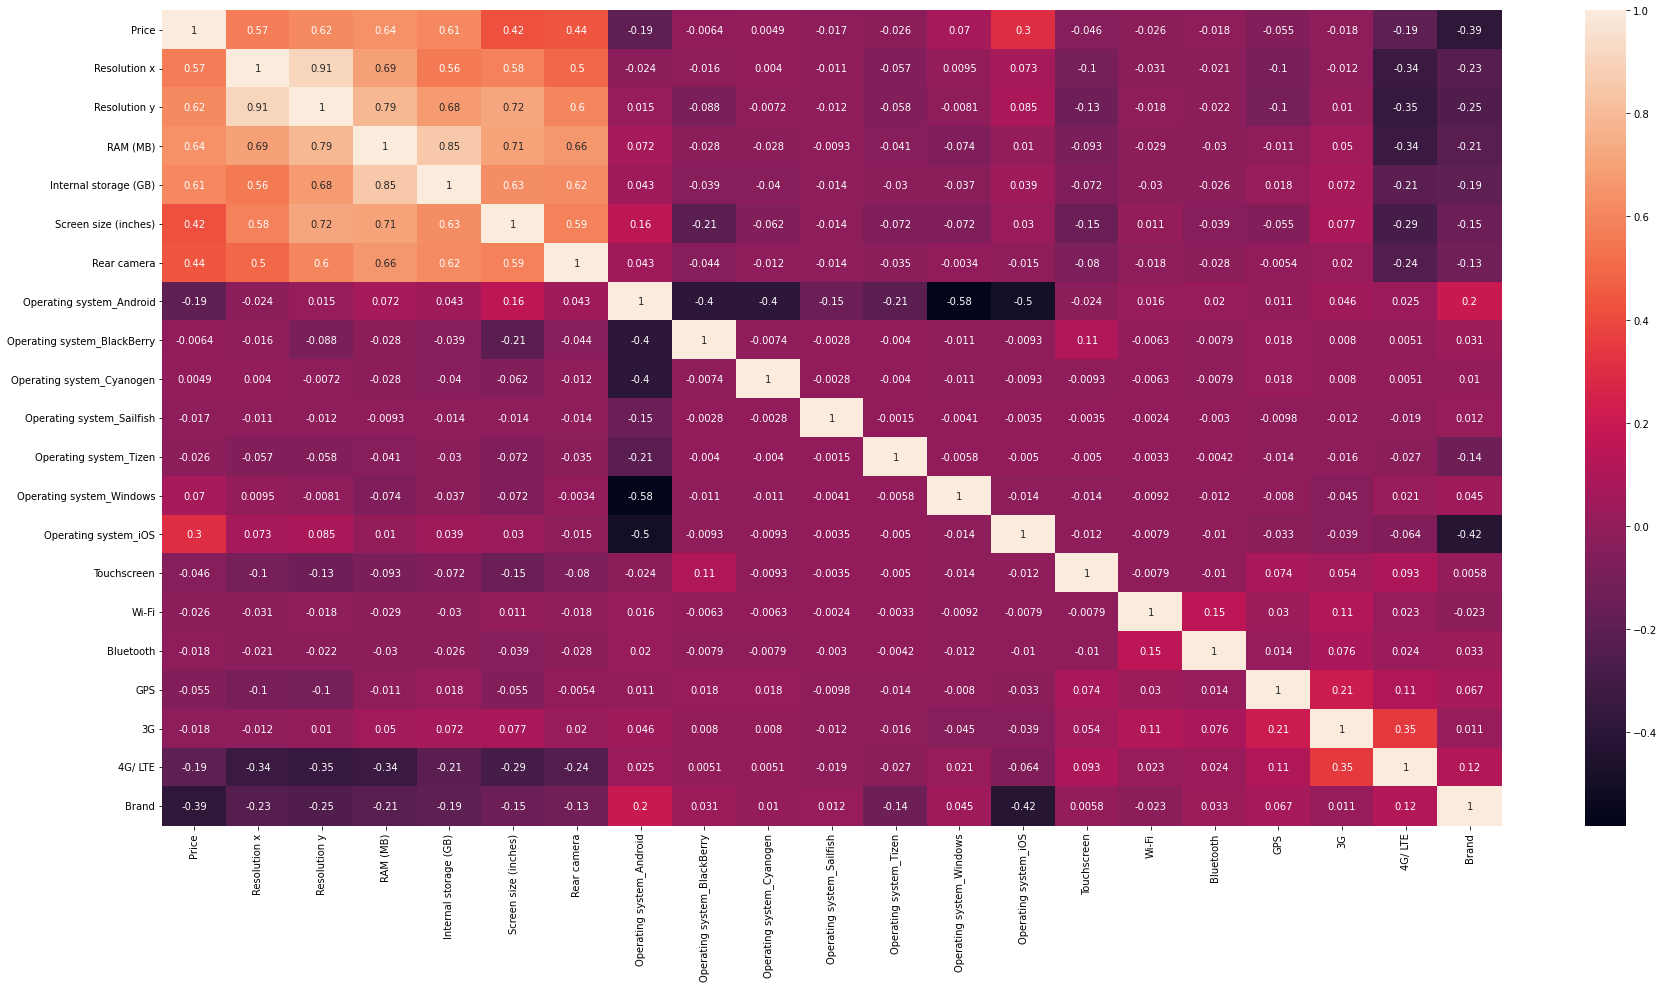

In [ ]:

fig,ax = plt.subplots(figsize=[30,15])

corr = df_final.corr()

ax = sns.heatmap(corr,annot=True)
plt.show()

In [ ]:
df_final.columns.tolist()

['Price',
 'Resolution x',
 'Resolution y',
 'RAM (MB)',
 'Internal storage (GB)',
 'Screen size (inches)',
 'Rear camera',
 'Operating system_Android',
 'Operating system_BlackBerry',
 'Operating system_Cyanogen',
 'Operating system_Sailfish',
 'Operating system_Tizen',
 'Operating system_Windows',
 'Operating system_iOS',
 'Touchscreen',
 'Wi-Fi',
 'Bluetooth',
 'GPS',
 '3G',
 '4G/ LTE',
 'Brand']

In [ ]:
df_final = df_final[[
 'Resolution x',
 'Resolution y',
 'RAM (MB)',
 'Internal storage (GB)',
 'Screen size (inches)',
 'Rear camera',
 'Brand'
]]

jika dilihat dari Heatmap Correlation, berdasarkan threshold yang saya miliki yaitu 0,4 pada Numerical Features dan 0,3 pada Categorical Features. Saya akan mengambil 6 features dari numerik dan 1 feture dari kategorik

### Handling Outlier

Meilihat Uique Value pada feature numerical yang sudah dipilih untuk memvalidasi apakah fitur tersebut memang bener fitur numerikal.

In [ ]:
df_final['Resolution x'].unique()

array([ 720,  480, 1080,  854,  560,  360, 1280,  640, 1440,  800, 1880,
        540,  240,  768, 2160,  828, 1242,  320,  750, 1600, 1520, 1176,
       1125,  400,  600,  850])

In [ ]:
df_final['Resolution y'].unique()

array([1280, 1440,  854, 1920, 2340,  480,  800,  960,  640,  720, 1500,
       2160, 2560, 2220, 1620, 2280, 1520, 2310, 1548,  320, 3120, 1080,
       3040, 2960, 2880, 3840, 1560, 1792, 2688, 2520, 2270, 2400, 1600,
       2316, 1498, 3200, 1334, 2246, 1480, 1544, 1290, 2436, 1136, 1580,
        485, 2244, 2240])

In [ ]:
df_final['RAM (MB)'].unique()

array([ 3000,  2000,  1000,  4000,  6000,   512,  8000,   768, 12000,
         256,   289,    64,   384])

In [ ]:
df_final['Screen size (inches)'].unique()

array([5.2 , 5.45, 5.  , 4.5 , 5.5 , 6.41, 4.  , 4.3 , 6.19, 3.1 , 6.2 ,
       6.44, 5.7 , 6.28, 6.3 , 6.  , 5.93, 6.4 , 6.22, 6.35, 5.8 , 6.59,
       5.71, 5.99, 3.2 , 4.7 , 6.67, 5.98, 6.8 , 6.23, 5.72, 5.1 , 6.1 ,
       6.5 , 5.4 , 5.3 , 6.08, 6.7 , 3.5 , 5.67, 6.9 , 4.95, 5.86, 6.39,
       6.47, 6.55, 6.18, 6.52, 6.65, 4.93, 5.6 , 6.53, 4.8 , 5.96, 6.01,
       5.65, 5.84, 6.21, 6.6 , 2.8 , 6.38, 6.26, 6.09, 3.8 , 2.44, 5.9 ,
       4.6 , 3.  , 2.6 , 4.2 , 5.47])

In [ ]:
df_final['Internal storage (GB)'].unique()

array([3.20e+01, 1.60e+01, 8.00e+00, 6.40e+01, 1.28e+02, 4.00e+00,
       2.56e+02, 5.12e-01, 2.00e+00, 3.00e+00, 6.40e-02, 1.60e-01,
       1.00e+00])

In [ ]:
df['Rear camera'].unique()

array([ 48. ,  64. ,  12. ,  16. ,  40. ,  12.2,  13. ,  12.3,  23. ,
        21. ,  32. ,  24. ,  20. ,  19. ,   2. ,  18. ,   8. ,  20.7,
         5. ,  10. ,  13.1,   8.7,   3. ,  41. ,   3.2, 108. ,  25. ,
         0. ,  21.5,   0.3,  15. ,  13.2])

Setelah dilihat, saya menyimpulkan bahwa 6 kolom tersebut memang benar merupakan Numerical Features, karena value nya tidak memiliki kelipatan atau urutan yang pasti dan juga pada handphone dapat dimiliki Resolusi, memori penyimpanan, RAM, ukuran layar, ataupun kamera yang bervariatif diluar dari entry data ini. Setelah memastikan bahwa feature tersebut merupakan numerical features, saya akan melakukan handling outlier pada feature tersebut.

In [ ]:
def plot_dist(df_num, col):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))

# histogram
    sns.histplot(df_num[col],ax = axes[0], bins=30)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(df_num[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(df_num[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()

# boxplot
    if df_num[col].skew() >= 1 or df_num[col].skew() <= -1 :
        sns.boxplot(y=df_num[col], ax =  axes[1], whis=3)
        axes[1].set_title(f"Boxplot '{col}'")
    
        plt.show()
    else:
        sns.boxplot(y=df_num[col], ax =  axes[1], whis=1.5)
        axes[1].set_title(f"Boxplot '{col}'")
    
        plt.show()
        
# skewness
    print(df_num[col].name + ' Skewness: ' + str(df_num[col].skew()))
    if -0.5 <= df_num[col].skew() <= 0.5:
        print("Columns '{}' normal distribution".format(col))
    elif df_num[col].skew() > 0.5:
        print("Columns '{}' right skewed".format(col))
    elif df_num[col].skew() < -0.5:
        print("Columns '{}' left skewed".format(col))

Melihat persebaran data dan nilai skew nya

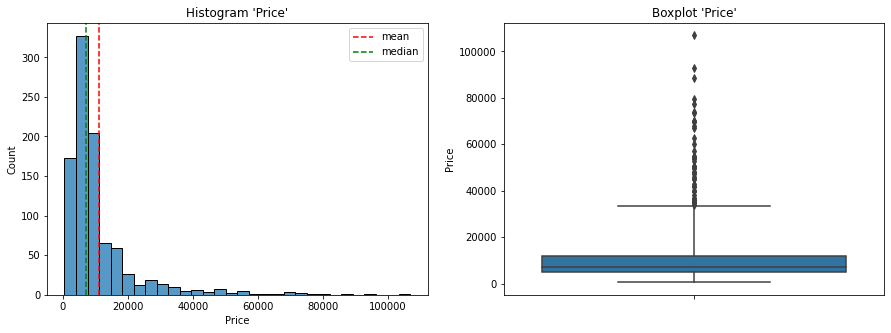

Price Skewness: 3.4562112614549285
Columns 'Price' right skewed


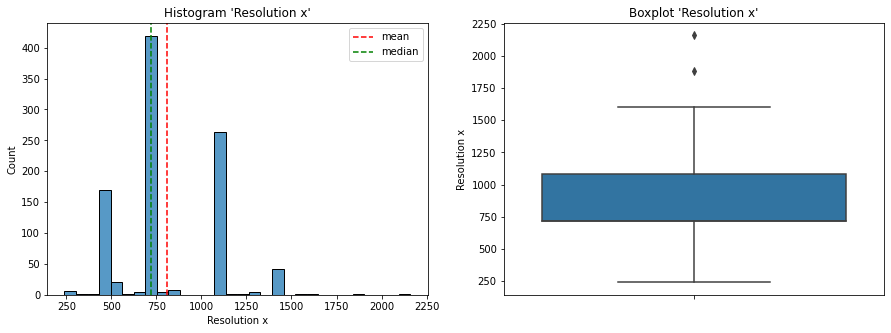

Resolution x Skewness: 0.70321051755099
Columns 'Resolution x' right skewed


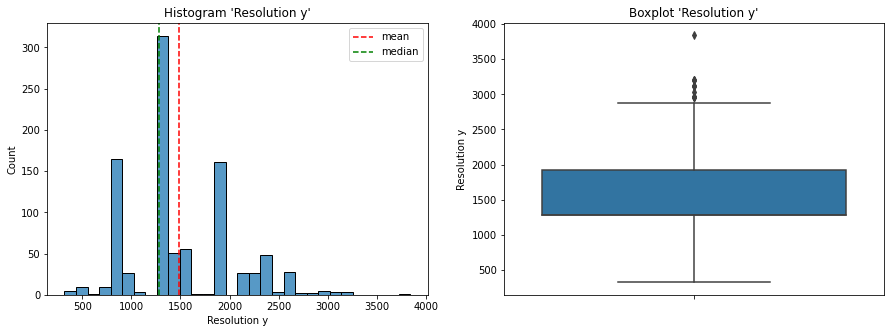

Resolution y Skewness: 0.6288746536020338
Columns 'Resolution y' right skewed


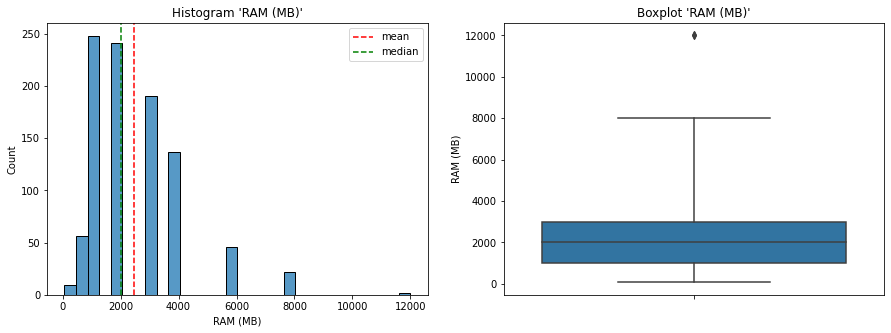

RAM (MB) Skewness: 1.4981974607612705
Columns 'RAM (MB)' right skewed


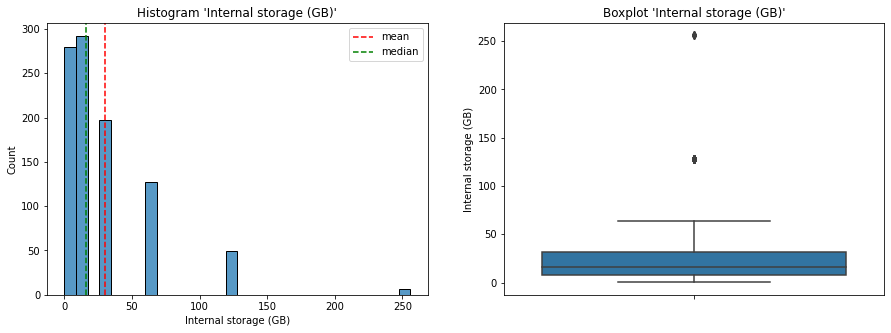

Internal storage (GB) Skewness: 2.9521117136130948
Columns 'Internal storage (GB)' right skewed


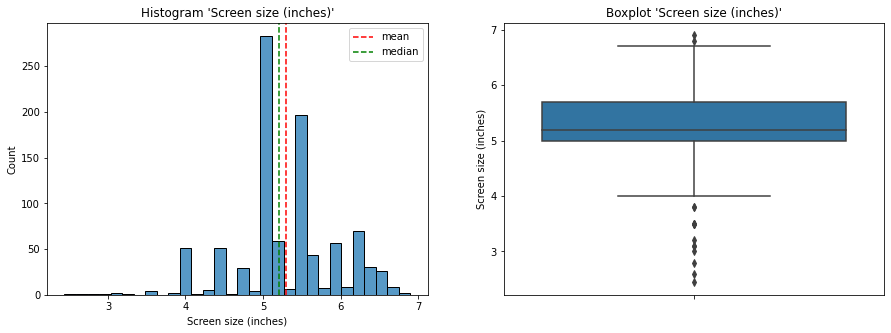

Screen size (inches) Skewness: -0.30568420054878964
Columns 'Screen size (inches)' normal distribution


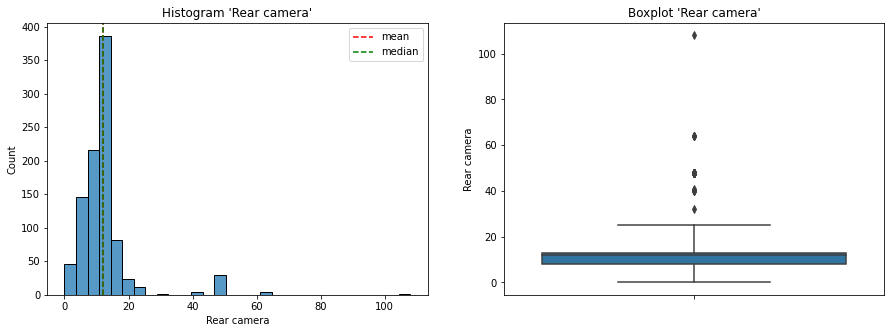

Rear camera Skewness: 3.7006436276983585
Columns 'Rear camera' right skewed


In [ ]:
for i in df_num:
  plot_dist(df_num,i)

Melihat persentase dan jumlah outlier yang dimiliki setiap feature

In [ ]:
for k in df_num:

  Q3 = df_num[k].quantile(.75)
  Q1 = df_num[k].quantile(.15)

  IQR = Q3 - Q1

  upper = Q3 + (3 * IQR)
  lower = Q1 - (3 * IQR)

  outlier = df_num[(df_num[k] > upper) | (df_num[k] < lower)]
  print(k)
  print('count of outlier: ', outlier.shape[0])
  print('percent k of outlier: ', outlier.shape[0]/df_num.shape[0] * 100, '%')
  print('='*70)

Price
count of outlier:  39
percent k of outlier:  4.100946372239748 %
Resolution x
count of outlier:  0
percent k of outlier:  0.0 %
Resolution y
count of outlier:  0
percent k of outlier:  0.0 %
RAM (MB)
count of outlier:  2
percent k of outlier:  0.2103049421661409 %
Internal storage (GB)
count of outlier:  55
percent k of outlier:  5.783385909568875 %
Screen size (inches)
count of outlier:  0
percent k of outlier:  0.0 %
Rear camera
count of outlier:  39
percent k of outlier:  4.100946372239748 %


Karena Persebaran datanya rata-rata merupakan Right Skew, maka saya akan melakukan capping dengan fold 3 karena rata-rata fitur memiliki nilai skew yang ekstrim yaitu diatas 1

In [ ]:
handlingout = [
 'Resolution x',
 'Resolution y',
 'RAM (MB)',
 'Internal storage (GB)',
 'Screen size (inches)',
 'Rear camera']

wins = Winsorizer(capping_method='iqr', tail='both', fold=3.0, variables= ['Resolution x',
 'Resolution y',
 'RAM (MB)',
 'Internal storage (GB)',
 'Screen size (inches)',
 'Rear camera'])

df_final_cleaned = wins.fit_transform(df_final)


### MinMaxScaling

Melakukan MinMaxScaling karena persebaran data pada numerical feature kebanyakan merupakan distribusi data yang tidak normal

In [ ]:
scaler = MinMaxScaler()

df_final_cleaned[handlingout] = scaler.fit_transform(df_final_cleaned[handlingout])

In [ ]:
df_final_cleaned

,Resolution x,Resolution y,RAM (MB),Internal storage (GB),Screen size (inches),Rear camera,Brand
0,0.25000,0.272727,0.328559,0.307266,0.5750,0.464286,5.0
1,0.25000,0.318182,0.216652,0.153325,0.6375,0.464286,5.0
2,0.25000,0.272727,0.328559,0.307266,0.5250,0.464286,5.0
3,0.25000,0.272727,0.216652,0.153325,0.5250,0.285714,5.0
4,0.12500,0.151705,0.104745,0.076355,0.4000,0.178571,5.0
...,...,...,...,...,...,...,...
946,0.43750,0.454545,0.216652,0.153325,0.7750,0.464286,5.0
947,0.15625,0.181818,0.104745,0.076355,0.4000,0.178571,4.0
948,0.43750,0.454545,0.440466,0.307266,0.5750,0.678571,5.0
949,0.12500,0.151705,0.104745,0.076355,0.5250,0.178571,5.0


## Data Pre-Processing

Pada Bagian Preprocessing, saya akan menggunakan Pipeline pada data Train dan data Test

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

membuat pipeline untuk Numerical Features

In [ ]:
num_pipeline = Pipeline([
        ('outlier', Winsorizer(capping_method='iqr', tail='both', fold=3)),
        ('scaler', MinMaxScaler())
    ])

In [ ]:
num_pipeline

Pipeline(steps=[('outlier', Winsorizer(capping_method='iqr', tail='both')),
                ('scaler', MinMaxScaler())])

Mengaplikasikan pipeline pada data Train

In [ ]:
num_tr = num_pipeline.fit_transform(X_train[['Resolution x',
 'Resolution y',
 'RAM (MB)',
 'Internal storage (GB)',
 'Screen size (inches)',
 'Rear camera']])
num_tr

array([[0.25      , 0.27272727, 0.32855864, 0.30726601, 0.575     ,
        0.46428571],
       [0.25      , 0.31818182, 0.21665175, 0.15332512, 0.6375    ,
        0.46428571],
       [0.25      , 0.27272727, 0.32855864, 0.30726601, 0.525     ,
        0.46428571],
       ...,
       [0.4375    , 0.45454545, 0.44046553, 0.30726601, 0.575     ,
        0.67857143],
       [0.125     , 0.15170455, 0.10474485, 0.07635468, 0.525     ,
        0.17857143],
       [0.125     , 0.15170455, 0.10474485, 0.15332512, 0.525     ,
        0.17857143]])

Membuat pipeline untuk Categorical Features

In [ ]:
df_cat['Brand'].unique()

array(['Others', 'OnePlus', 'Samsung', 'Motorola', 'Google', 'Apple'],
      dtype=object)

In [ ]:
cat_pipeline = Pipeline([
        ('ordinal_enc', OrdinalEncoder(categories=[
                                                   ['Apple','Samsung','Google','OnePlus', 'Motorola','Others' ]])) 
    ])

cat_1_tr = cat_pipeline.fit_transform(X_train[['Brand']])
cat_1_tr

array([[5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [3.],
       [5.],
       [5.],
       [5.],
       [5.],
       [1.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [1.],
       [5.],
       [5.],
       [4.],
       [1.],
       [1.],
       [5.],
       [1.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [1.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],

Membuat pipeline baru yang menghubungkan pipeline numerical dan categorical features

In [ ]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, ['Resolution x',
 'Resolution y',
 'RAM (MB)',
 'Internal storage (GB)',
 'Screen size (inches)',
 'Rear camera']),
        ("cat_ord", cat_pipeline, ['Brand']),
    ])

train_tr = full_pipeline.fit_transform(X_train)
train_tr

array([[0.25      , 0.27272727, 0.32855864, ..., 0.575     , 0.46428571,
        5.        ],
       [0.25      , 0.31818182, 0.21665175, ..., 0.6375    , 0.46428571,
        5.        ],
       [0.25      , 0.27272727, 0.32855864, ..., 0.525     , 0.46428571,
        5.        ],
       ...,
       [0.4375    , 0.45454545, 0.44046553, ..., 0.575     , 0.67857143,
        5.        ],
       [0.125     , 0.15170455, 0.10474485, ..., 0.525     , 0.17857143,
        5.        ],
       [0.125     , 0.15170455, 0.10474485, ..., 0.525     , 0.17857143,
        5.        ]])

In [ ]:
train_manual = np.array(df_final_cleaned[[
 'Resolution x',
 'Resolution y',
 'RAM (MB)',
 'Internal storage (GB)',
 'Screen size (inches)',
 'Rear camera',
 'Brand']])

np.allclose(train_tr, train_manual)

True

In [ ]:
test_tr = full_pipeline.transform(X_test)
test_tr

array([[0.15625   , 0.18181818, 0.10474485, ..., 0.35      , 0.17857143,
        4.        ],
       [0.25      , 0.27272727, 0.32855864, ..., 0.65      , 0.46428571,
        5.        ],
       [0.4375    , 0.45454545, 0.32855864, ..., 0.525     , 0.57142857,
        5.        ],
       ...,
       [0.25      , 0.27272727, 0.21665175, ..., 0.525     , 0.28571429,
        5.        ],
       [0.125     , 0.13636364, 0.05013429, ..., 0.275     , 0.17857143,
        5.        ],
       [0.25      , 0.27272727, 0.21665175, ..., 0.45      , 0.28571429,
        5.        ]])

## Modeling

### Model Definition

In [ ]:
linreg = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
ridge = Ridge()

### Model Training

In [ ]:
linreg.fit(train_tr, y_train)

LinearRegression()

In [ ]:
dt.fit(train_tr, y_train)

DecisionTreeRegressor()

In [ ]:
rf.fit(train_tr, y_train)

RandomForestRegressor()

In [ ]:
ridge.fit(train_tr, y_train)

Ridge()

### Model Evaluation

In [ ]:
pred_train_lr = linreg.predict(train_tr)
pred_test_lr = linreg.predict(test_tr)

print("="*20,"TRAINING","="*20)
print("Mean absolute error:",mean_absolute_error(y_train,pred_train_lr))
print("R2 Score:",r2_score(y_train,pred_train_lr))
print("="*20,"TEST","="*20)
print("Mean absolute error:",mean_absolute_error(y_test,pred_test_lr))
print("R2 Score:",r2_score(y_test,pred_test_lr))

==================== TRAINING ====================
Mean absolute error: 4930.126210835882
R2 Score: 0.5015140604953181
==================== TEST ====================
Mean absolute error: 6348.87606701432
R2 Score: 0.4002497582980108


In [ ]:
pred_train_rf = rf.predict(train_tr)
pred_test_rf = rf.predict(test_tr)

print("="*20,"TRAINING","="*20)
print("Mean absolute error:",mean_absolute_error(y_train,pred_train_rf))
print("R2 Score:",r2_score(y_train,pred_train_rf))
print("="*20,"TEST","="*20)
print("Mean absolute error:",mean_absolute_error(y_test,pred_test_rf))
print("R2 Score:",r2_score(y_test,pred_test_rf))

==================== TRAINING ====================
Mean absolute error: 2150.371676836339
R2 Score: 0.8942282114727127
==================== TEST ====================
Mean absolute error: 5363.000627063274
R2 Score: 0.5121337386599983


In [ ]:
pred_train_dt = dt.predict(train_tr)
pred_test_dt = dt.predict(test_tr)

print("="*20,"TRAINING","="*20)
print("Mean absolute error:",mean_absolute_error(y_train,pred_train_dt))
print("R2 Score:",r2_score(y_train,pred_train_dt))
print("="*20,"TEST","="*20)
print("Mean absolute error:",mean_absolute_error(y_test,pred_test_dt))
print("R2 Score:",r2_score(y_test,pred_test_dt))

==================== TRAINING ====================
Mean absolute error: 1178.008562807096
R2 Score: 0.936204457513393
==================== TEST ====================
Mean absolute error: 6163.215258991417
R2 Score: 0.32709087444298024


In [ ]:
pred_train_ridge = ridge.predict(train_tr)
pred_test_ridge = ridge.predict(test_tr)

print("="*20,"TRAINING","="*20)
print("Mean absolute error:",mean_absolute_error(y_train,pred_train_ridge))
print("R2 Score:",r2_score(y_train,pred_train_ridge))
print("="*20,"TEST","="*20)
print("Mean absolute error:",mean_absolute_error(y_test,pred_test_ridge))
print("R2 Score:",r2_score(y_test,pred_test_ridge))


==================== TRAINING ====================
Mean absolute error: 4888.662632946933
R2 Score: 0.5008768540395458
==================== TEST ====================
Mean absolute error: 6316.929223356675
R2 Score: 0.3971579424848053


Setelah dilakukan Evaluasi terhadap 4 model, dapat dilihat dari hasil Model Evaluation nilai Test yang paling baik dimiliki oleh Random Forest dan nilai Train yang paling baik adalah Decision Tree. Namun jika saya bandingkan kedua model tersebut, model Decision Tree lebih overfit daripada Random Forest, sehingga saya akan mengambil Random Forest sebagai Best Model. 

### Hyperparameter Tuning For Best Model (Random Forest)

Mencari parameter yang terbaik untuk Random Forest dengan menggunakan Random Search

Inisiasi 5 parameter dan juga nilai dari kelima parameter tersebut secara acak

In [ ]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

Melakukan Random Search

In [ ]:
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [ ]:
rf_random.fit(train_tr, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

Melihat 5 parameter terbaik untuk dipakai

In [ ]:
rf_random.best_params_

{'n_estimators': 50,
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': False}

In [ ]:
rf_random.best_score_

0.5614828162006849

Setelah dilakukan tuning, dapat dilihat bahwa setelah dilakukan tuning, nilai R2 Score naik walaupun tidak tertinggi, namun dapat kita tarik kesimpulan bahwa model tuning sudah dapat mengurangi nilai MAE

### Model Evaluation For Best Model (Random Forest)

In [ ]:
best_model = rf_random.best_estimator_

In [ ]:
pred_train_rf_tuning = best_model.predict(train_tr)
pred_test_rf_tuning = best_model.predict(test_tr)

print("="*20,"TRAINING SETELAH TUNING","="*20)
print("Mean absolute error:",mean_absolute_error(y_train,pred_train_rf_tuning))
print("R2 Score:",r2_score(y_train,pred_train_rf_tuning))

print("="*20,"TEST SETELAH TUNING","="*20)
print("Mean absolute error:",mean_absolute_error(y_test,pred_test_rf_tuning))
print("R2 Score:",r2_score(y_test,pred_test_rf_tuning))


==================== TRAINING SETELAH TUNING ====================
Mean absolute error: 3092.5168119703267
R2 Score: 0.7720567871041633
==================== TEST SETELAH TUNING ====================
Mean absolute error: 5174.782129614358
R2 Score: 0.5254300583396534


Dapat kita lihat pada test Model Tuning, nilai MAE sudah cukup turun dan nilai R2 Score naik, sehingga selisih harga kesalahan prediksi dengan harga asli juga semakin berkurang

pipeline untuk model inference

In [ ]:
all_process = Pipeline([
    ("preprocess", full_pipeline),
    ("classification", best_model)
])

all_process.fit(X_train, y_train)
hasil = all_process.predict(X_test)

print("Mean absolute error:",mean_absolute_error(y_test,hasil))
print("R2 Score:",r2_score(y_test,hasil))

Mean absolute error: 5231.033060992789
R2 Score: 0.5170448364218101


## Model Inference

Mengimplementasikan model yang sudah dibuat terhadap data baru diluar Train Set dan Test Set

In [ ]:
df_inf

,Brand,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,RAM (MB),Internal storage (GB),Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
965,Others,4000,5.50,Yes,720,1280,4,2000,16.0,8.0,5.0,Android,Yes,Yes,Yes,2,Yes,Yes,4499
657,Others,2400,5.45,Yes,480,960,4,1000,8.0,5.0,2.0,Android,Yes,Yes,Yes,2,Yes,Yes,3751


In [ ]:
all_process.predict(df_inf)

array([5434.13329237, 4429.14541033])

Sesuai dengan nilai MAE pada evaluasi model, selisih harga prediksi dan harga asli terdapat perbedaan yang cukup jauh

--------------------------------------------------------------------------------

In [ ]:
# save model
pickle.dump(all_process, open("phoneprice_pred.pkl", "wb"))

In [ ]:
set_config(display='diagram')

In [ ]:
all_process

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              tail='both')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Resolution x',
                                                   'Resolution y', 'RAM (MB)',
                                                   'Internal storage (GB)',
                                                   'Screen size (inches)',
                                                   'Rear camera']),
                                                 ('cat_ord',
                                                  Pipeline(steps=[('ordinal_enc',
                                                                   OrdinalEncoder(categories=[['Apple',
                                                                                               'Samsung',
                                                                                               'Google',
                                                                                               'OnePlus',
                                                                                               'Motorola',
                                                                                               'Others']]))]),
                                                  ['Brand'])])),
                ('classification',
                 RandomForestRegressor(bootstrap=False, max_depth=60,
                                       max_features='sqrt', min_samples_leaf=3,
                                       min_samples_split=6, n_estimators=50))])

## Model Saving

In [ ]:
# STEP 1 - Import saved model
model = pickle.load(open("phoneprice_pred.pkl", "rb"))

## Model Inference for Deployment

In [98]:
clas = model.predict(df_inf).tolist()[0]
clas

5434.133292371192

## Conclusion

Pada Project kali ini, saya melakukan Model Regresi untuk memprediksi harga Handphone sesuai dengan spesifikasi yang dimilikinya. Setelah dilakukan Feature Selection, dapat disimpulkan bahwa spesifikasi yang paling mempengaruhi harga sebuah Handphone adalah Resolusi layar, RAM, memori penyimpanan, ukuran layar, kamera belakang, dan Brand yang memproduksinya.

Jika dilihat dari hasil eksplorasi data:
- produksi Handphone pada zaman sekarang rata-rata sudah harus memiliki fitur WI-Fi, Bluetooth, GPS, dan mampu akses sinyal 3G maupun 4G. Selain itu Handphone zaman sekarang biasanya adalah Handphone dengan layar sentuh
- Brand OnePlus merupakan Brand dengan kamera belakang yang paling bagus. Namun semua Brand rata-rata sudah memiliki kualitas kamera diatas 10 megapixel
- Terbukti bahwa memori penyimpanan mempengaruhi harga, karena semakin besar memori penyimpanan, maka biasanya harga Handphone akan semakin mahal.

Jika kita lihat dari hasil pembuatan 4 model regresi yaitu Linear Regression, Decision Tree, Random Forest, dan Ridge; model yang terbaik adalah Random Forest, namun sebenarnya dari hasil keempat model tersebut, baik R2 Score maupun MAE nya belum memiliki nilai yang baik, dimana nilai R2 Score yang terbaik hanya mencapai sekitar 0,51 yang artinya model belum dapat memprediksi harga Handphone dengan cukup akurat. Ditinjau dari nilai MAE, model memiliki tingkat selisih salah memprediksi harga sebesar 5363 rupees keatas atau kebawah. Selisih harga tersebut masih bisa dibilang cukup jauh untuk rentang harga sebuah Handphone. 

Setelah dilakukan Tuning, Model Random Forest hanya mengalami sedikit peningkatan pada nilai R2 dan sedikit pengurangan pada nilai MAE, dimana model kini memiliki tingkat selisih salah memprediksi harga sebesar 5174, dimana pengurangan selisih tersebut tidak terlalu jauh dari model baseline.

Dapat disimpulkan juga bahwa model yang telah dibuat semuanya ovefit, dimana Data Train memiliki nilai yang jauh lebih besar daripada nilai pada Data Test.

